In [1]:
# Data handling
import json
import numpy as np
import pandas as pd
from rich import print

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import preprocessing
from nltk import word_tokenize

# Visualization
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


def extract_tf_idf(documents, ngram_range=(1, 3)):
    no_features = None
    tfidf_vectorizer = TfidfVectorizer(max_features=no_features, ngram_range=ngram_range)
    tf_idf = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    df_idf = pd.DataFrame(np.array([tfidf_feature_names, tfidf_vectorizer.idf_]).T, columns=['Word', 'IDF'])
    
    return df_idf

def get_top_n_words(corpus, n=None, stopwords=None, ngram_range=(1, 1)):
    """ List the top n words in a vocabulary according to occurrence in a text corpus. """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def visualize_word_frequenty(data, n):
    f, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(y=[x[0] for x in data[:n]], x=[y[1] for y in data[:n]], color='b')


with open('coco_reviews.json') as f:
    coco = json.load(f)
    
with open('frozen_reviews.json') as f:
    frozen = json.load(f)

## Analysis

In [83]:
freq = get_top_n_words(coco, n=100, stopwords="english", ngram_range=(1, 1))

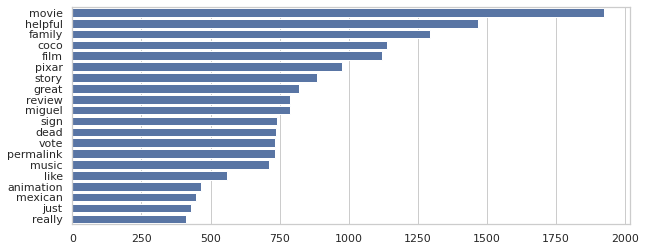

In [84]:
visualize_word_frequenty(freq, 20)

In [485]:
df_idf = extract_tf_idf(coco, ngram_range=(1, 3))

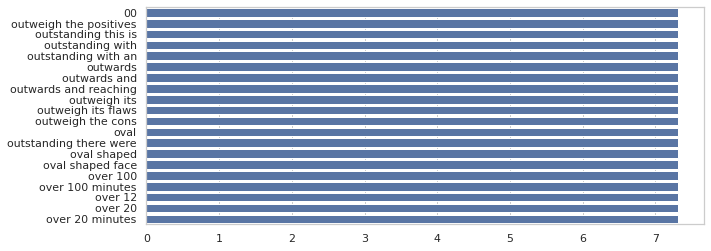

In [486]:
visualize_word_frequenty([tuple(r) for r in df_idf.sort_values("IDF", ascending=False).to_numpy()], 20)

## Compare

In [30]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    """ Calculate Class-based TF-IDF
    
    The result is a single score for each word
    
    documents = list of documents where each entry contains a single string
    of each class. For example, let's say you have 200 documents per class and you have 2 classes. 
    The documents is a list of two documents, where each document is a join of all 200 documents. 
    
    m = total number of documents
    
    """
    
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents)
    t = np.array(t.todense()).T
    w = t.sum(axis=0)
    tf = np.divide(t+1,w+1)
    sum_tij = np.array(t.sum(axis=1)).T
    idf = np.log(np.divide(m, sum_tij)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    
    return tf_idf, count

In [21]:
with open('data/pixar_reviews.json') as f:
    reviews = json.load(f)
    
titles = list(reviews.keys())
documents = [" ".join([doc for _, doc in reviews[title]]) for title in titles]
m = sum([len(reviews[title]) for title in titles])

In [31]:
# documents = [coco_single, frozen_single]
# m = len(coco) + len(frozen)
tf_idf, count = c_tf_idf(documents, m, ngram_range=(1, 3))

In [32]:
result = pd.DataFrame(tf_idf, index=count.get_feature_names(), columns=titles)

In [51]:
result.sort_values("Toy Story 3", ascending=False).head(10)

Toy Story  A Bug's Life  Toy Story 2  Monsters, Inc.  \
toys           0.003512      0.000092     0.001857        0.000102   
andy           0.003403      0.000011     0.001493        0.000005   
the toys       0.001429      0.000055     0.001093        0.000038   
toy story      0.001404      0.000578     0.001849        0.000439   
lotso          0.000034      0.000021     0.000023        0.000010   
college        0.000009      0.000034     0.000018        0.000047   
woody          0.003534      0.000220     0.003386        0.000049   
daycare        0.000012      0.000023     0.000012        0.000010   
toy            0.001553      0.000384     0.001653        0.000293   
toy story is   0.001881      0.000088     0.001742        0.000034   

              Finding Nemo  The Incredibles      Cars  Ratatouille    WALL-E  \
toys              0.000063         0.000039  0.000115     0.000043  0.000040   
andy              0.000021         0.000009  0.000008     0.000004  0.000004   
the toys          0.000013         0.000015  0.000027     0.000028  0.000003   
toy story         0.000245         0.000169  0.000251     0.000140  0.000092   
lotso             0.000007         0.000006  0.000008     0.000007  0.000004   
college           0.000033         0.000014  0.000020     0.000017  0.000007   
woody             0.000031         0.000006  0.000018     0.000013  0.000009   
daycare           0.000022         0.000006  0.000018     0.000008  0.000009   
toy               0.000167         0.000113  0.000181     0.000094  0.000064   
toy story is      0.000014         0.000016  0.000017     0.000015  0.000006   

                    Up  ...  Monsters University  Inside Out  \
toys          0.000031  ...             0.000033    0.000041   
andy          0.000006  ...             0.000013    0.000013   
the toys      0.000015  ...             0.000017    0.000010   
toy story     0.000117  ...             0.000160    0.000166   
lotso         0.000011  ...             0.000013    0.000010   
college       0.000009  ...             0.002844    0.000032   
woody         0.000006  ...             0.000019    0.000018   
daycare       0.000006  ...             0.000014    0.000005   
toy           0.000081  ...             0.000110    0.000111   
toy story is  0.000016  ...             0.000018    0.000010   

              The Good Dinosaur  Finding Dory    Cars 3      Coco  \
toys                   0.000031      0.000031  0.000156  0.000018   
andy                   0.000017      0.000005  0.000017  0.000004   
the toys               0.000007      0.000014  0.000054  0.000009   
toy story              0.000089      0.000134  0.000100  0.000107   
lotso                  0.000011      0.000011  0.000017  0.000007   
college                0.000043      0.000009  0.000027  0.000029   
woody                  0.000012      0.000008  0.000006  0.000005   
daycare                0.000012      0.000023  0.000018  0.000008   
toy                    0.000062      0.000090  0.000075  0.000070   
toy story is           0.000022      0.000015  0.000012  0.000005   

              Incredibles 2  Toy Story 4    Onward  Importance  
toys               0.000019     0.001573  0.000011    0.003079  
andy               0.000004     0.000911  0.000016    0.000445  
the toys           0.000005     0.000884  0.000010    0.000339  
toy story          0.000048     0.002050  0.000112    0.004414  
lotso              0.000007     0.000103  0.000015    0.000725  
college            0.000018     0.000164  0.000012    0.000601  
woody              0.000003     0.003216  0.000011    0.000695  
daycare            0.000008     0.000019  0.000016    0.001389  
toy                0.000031     0.001659  0.000072    0.003849  
toy story is       0.000010     0.001061  0.000021    0.000780  

[10 rows x 23 columns]

In [47]:
result["Importance"] = result["WALL-E"].values / result.drop("WALL-E", 1).reset_index(drop=True).sum(axis=1).values

In [48]:
result.sort_values("Importance", ascending=False).head(10)

Toy Story  A Bug's Life  Toy Story 2  Monsters, Inc.  Finding Nemo  \
eve         0.000024      0.000015     0.000024        0.000007      0.000005   
wall is     0.000009      0.000016     0.000009        0.000007      0.000010   
robot       0.000008      0.000015     0.000008        0.000013      0.000005   
earth       0.000049      0.000039     0.000014        0.000036      0.000046   
robots      0.000009      0.000017     0.000018        0.000008      0.000005   
wall        0.000076      0.000013     0.000029        0.000034      0.000017   
ship        0.000043      0.000020     0.000032        0.000009      0.000070   
plant       0.000024      0.000068     0.000012        0.000218      0.000007   
the earth   0.000012      0.000022     0.000012        0.000021      0.000014   
space       0.001169      0.000063     0.000296        0.000029      0.000080   

           The Incredibles      Cars  Ratatouille    WALL-E        Up  ...  \
eve               0.000004  0.000006     0.000010  0.003122  0.000008  ...   
wall is           0.000009  0.000006     0.000005  0.002692  0.000030  ...   
robot             0.000239  0.000017     0.000019  0.002925  0.000043  ...   
earth             0.000049  0.000051     0.000065  0.003273  0.000066  ...   
robots            0.000097  0.000046     0.000011  0.002217  0.000037  ...   
wall              0.000041  0.000041     0.000056  0.005169  0.000484  ...   
ship              0.000016  0.000008     0.000020  0.001435  0.000043  ...   
plant             0.000006  0.000017     0.000008  0.001034  0.000012  ...   
the earth         0.000024  0.000017     0.000015  0.001016  0.000018  ...   
space             0.000038  0.000037     0.000037  0.001867  0.000029  ...   

           Monsters University  Inside Out  The Good Dinosaur  Finding Dory  \
eve                   0.000009    0.000007           0.000015      0.000007   
wall is               0.000010    0.000004           0.000016      0.000008   
robot                 0.000045    0.000034           0.000015      0.000007   
earth                 0.000024    0.000030           0.000526      0.000013   
robots                0.000010    0.000016           0.000009      0.000017   
wall                  0.000110    0.000114           0.000102      0.000077   
ship                  0.000024    0.000023           0.000020      0.000030   
plant                 0.000041    0.000010           0.000046      0.000011   
the earth             0.000014    0.000021           0.000308      0.000011   
space                 0.000029    0.000055           0.000064      0.000063   

             Cars 3      Coco  Incredibles 2  Toy Story 4    Onward  \
eve        0.000012  0.000005       0.000005     0.000004  0.000021   
wall is    0.000013  0.000006       0.000006     0.000005  0.000023   
robot      0.000011  0.000010       0.000030     0.000016  0.000010   
earth      0.000041  0.000036       0.000041     0.000015  0.000037   
robots     0.000027  0.000018       0.000018     0.000005  0.000012   
wall       0.000100  0.000127       0.000007     0.000009  0.000077   
ship       0.000031  0.000014       0.000062     0.000023  0.000029   
plant      0.000053  0.000008       0.000016     0.000006  0.000016   
the earth  0.000035  0.000008       0.000015     0.000013  0.000016   
space      0.000025  0.000033       0.000038     0.000053  0.000056   

           Importance  
eve          1.790829  
wall is      1.272270  
robot        0.846463  
earth        0.354379  
robots       0.309487  
wall         0.257638  
ship         0.195886  
plant        0.194906  
the earth    0.193307  
space        0.186029  

[10 rows x 23 columns]

In [511]:
result.sort_values("Frozen", ascending=False).head(10)

Coco    Frozen  Importance
sister    0.000062  0.002610    0.023765
ice       0.000007  0.002563    0.002860
olaf      0.000199  0.002476    0.080221
snow      0.000024  0.002469    0.009812
powers    0.000024  0.002462    0.009904
hans      0.000017  0.002413    0.007067
snowman   0.000017  0.002400    0.007183
queen     0.000018  0.002382    0.007348
let       0.000433  0.002376    0.182069
princess  0.000035  0.002372    0.014759